In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/Heart_disease_cleveland_new (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


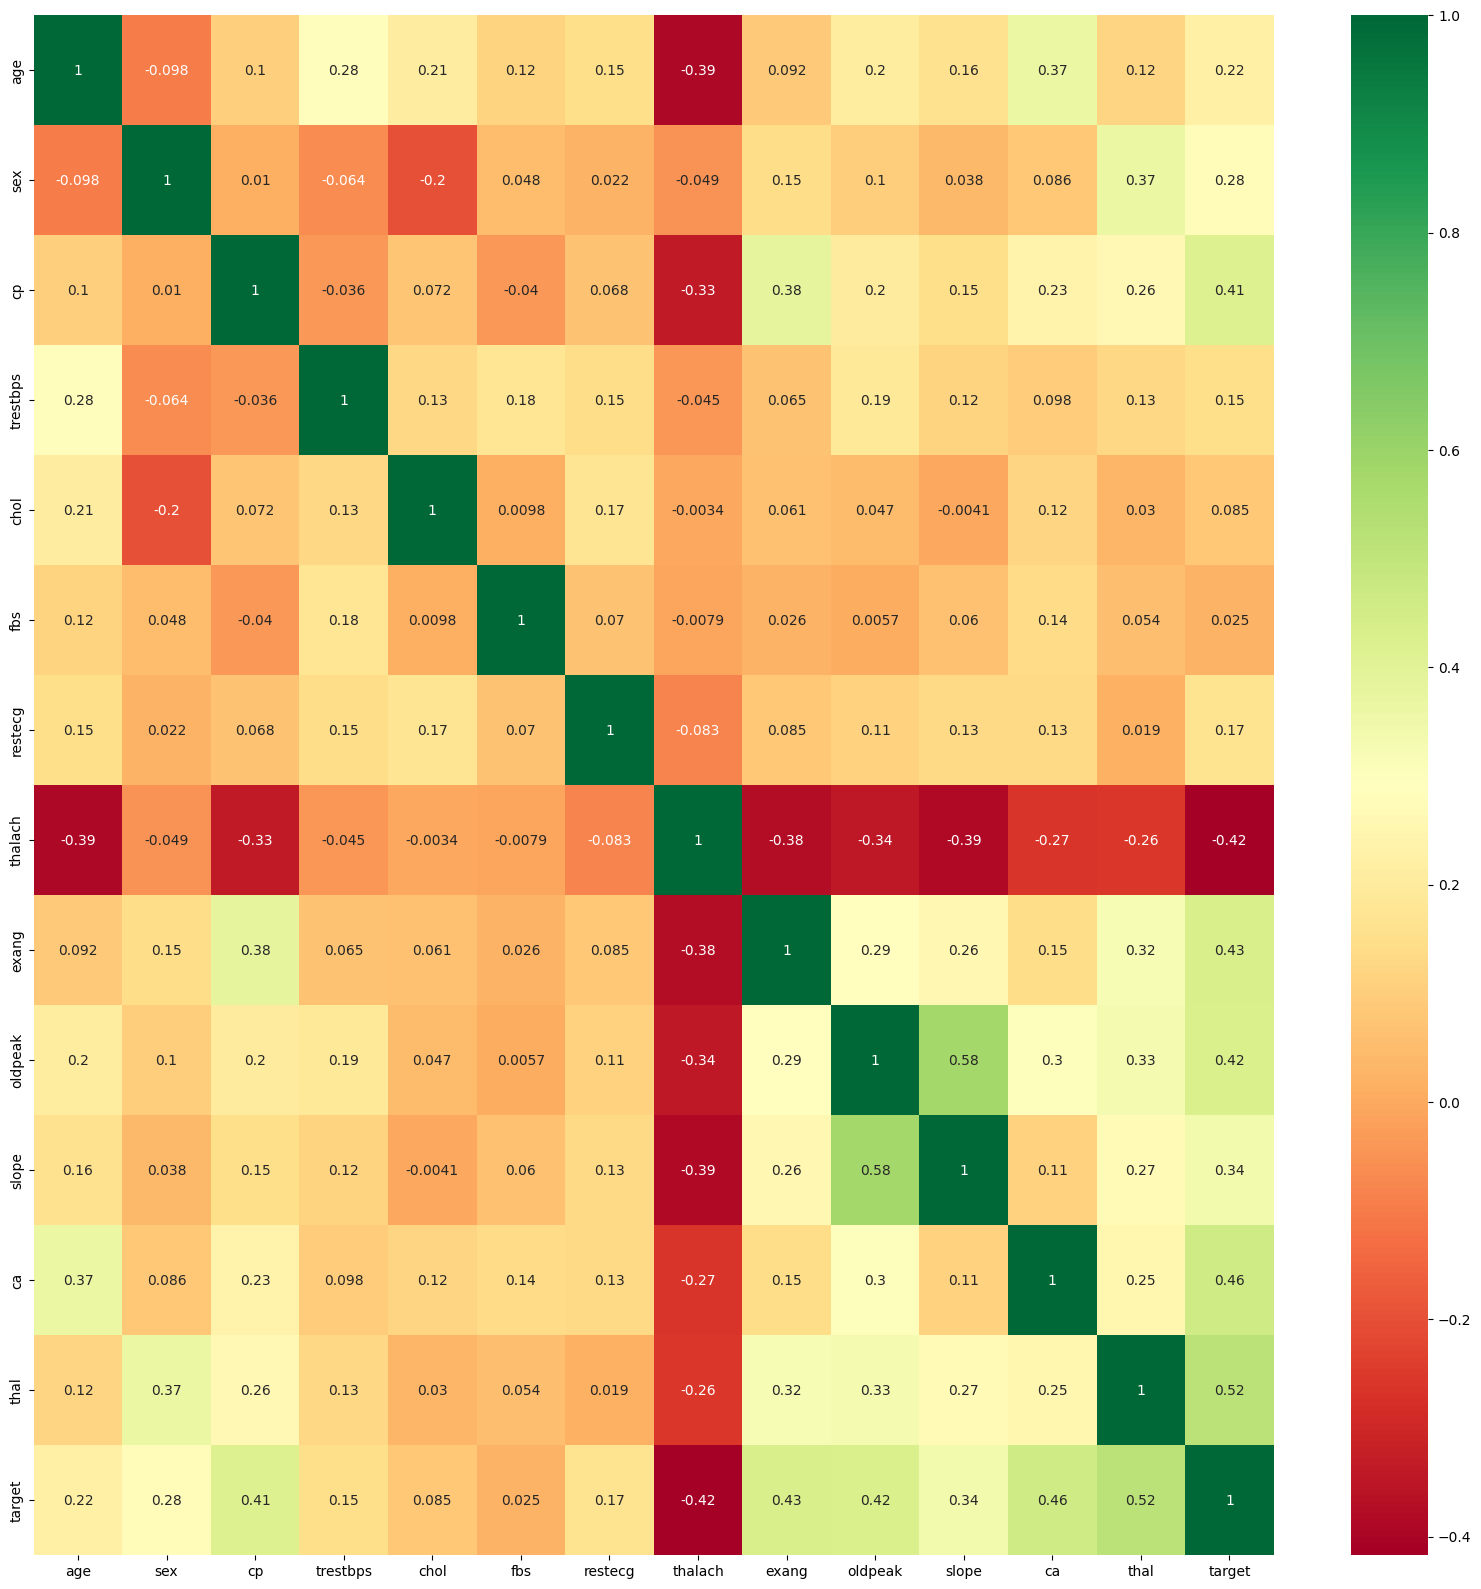

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

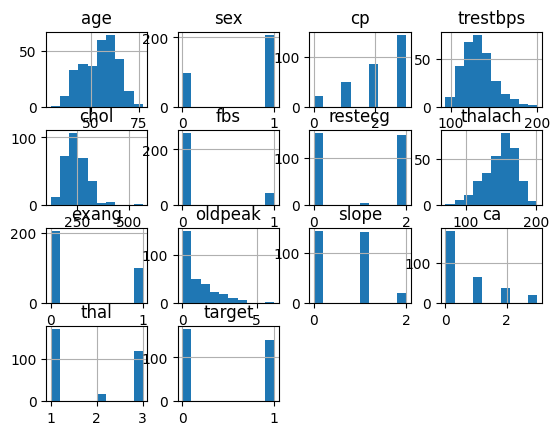

In [ ]:
df.hist()


<Axes: xlabel='target', ylabel='count'>

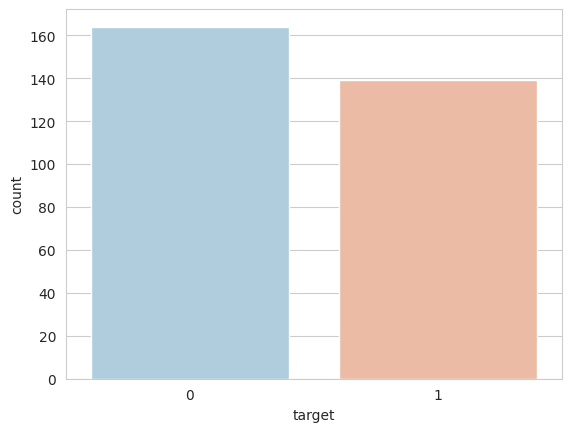

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

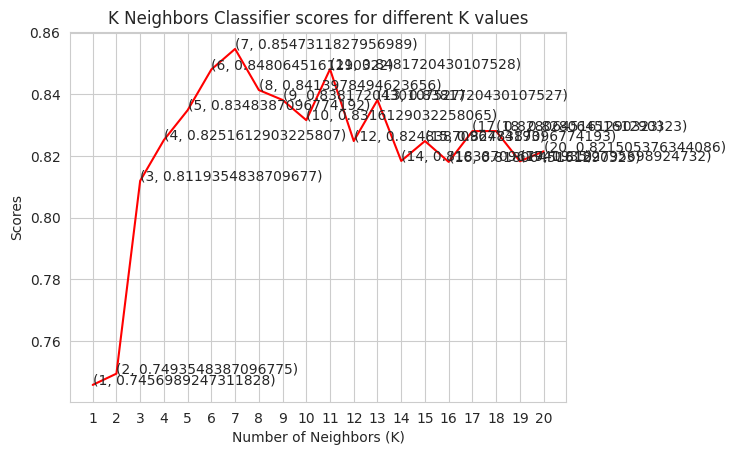

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.864382257757472

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.798494623655914

Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [ ]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
37,0.283813,1.042090,0.566959,-1.646753,-0.379244,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
16,-0.713556,-1.234430,-0.342283,0.805384,-0.034166,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
126,0.172994,3.887739,0.799106,-0.727201,2.553921,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
291,0.062176,0.017656,1.843767,0.717808,0.138373,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
273,1.835277,-1.120604,-1.889929,-1.077507,0.483451,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.048643,3.432436,0.702378,1.987664,-0.896862,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
71,1.392002,-0.380735,0.141357,0.586443,-0.724323,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
106,0.505451,0.472960,-1.348253,0.542655,-0.896862,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
270,0.727089,0.472960,-0.767885,-0.508261,0.742260,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
treemodel=DecisionTreeClassifier(max_depth=2)

In [ ]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[10] <= 0.5\ngini = 0.494\nsamples = 203\nvalue = [113, 90]'),
 Text(0.25, 0.5, 'x[0] <= 0.228\ngini = 0.337\nsamples = 112\nvalue = [88, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.178\nsamples = 71\nvalue = [64, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.485\nsamples = 41\nvalue = [24, 17]'),
 Text(0.75, 0.5, 'x[21] <= 0.5\ngini = 0.399\nsamples = 91\nvalue = [25, 66]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.499\nsamples = 40\nvalue = [21, 19]')]

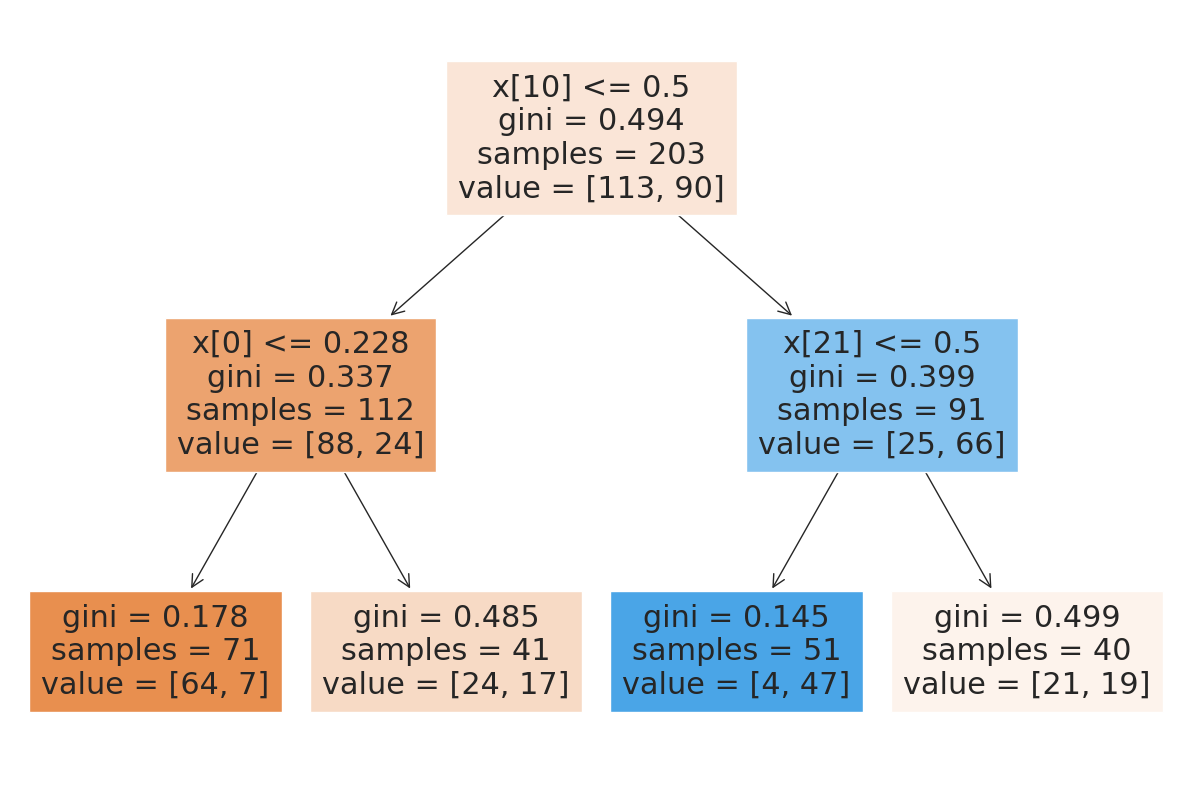

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

0.75
